# **4조**
**오차역전파(계산 그래프, 연쇄법칙, 역전파)**

## 1. 계산 그래프 및 연쇄법칙 (15점)

문제 1 : Local Gradient, Global Gradient가 무엇인지 서술하세요. (5점)

정답 :Local Gradient는 네트워크의 특정 노드 또는 층에서 계산된 기울기를 의미합니다. 일반적으로 네트워크의 특정 가중치에 대한 손실 함수의 편미분 값으로 나타낼 수 있습니다. 이는 그 노드에서의 출력 변화가 손실 함수에 미치는 직접적인 영향을 측정합니다. Local Gradient는 역전파 과정에서 각 층의 기울기를 계산할 때와 다음 층으로 전파될 때 기울기를 수정하기 위해 사용됩니다.
예를 들어, 활성화 함수의 기울기, 층의 가중치 및 편향의 기울기 등이 포함됩니다.

  Global Gradient는 전체 네트워크를 통한 손실 함수의 변화율을 나타내며, 최종 손실 함수와 네트워크의 각 가중치 사이의 관계를 보여줍니다. 이는 네트워크의 모든 층을 통해 전파된 기울기를 통합한 값으로, 전체 네트워크의 출력에 대한 특정 가중치의 영향을 측정합니다. Global Gradient는 역전파 알고리즘의 최종 결과로서, 네트워크의 가중치를 업데이트하는 데 사용됩니다. 이 값은 특정 가중치가 전체 손실에 미치는 총 영향을 나타내며, 학습률과 함께 사용되어 가중치의 업데이트 양을 결정합니다.

문제 2 : 역전파 과정에서는 <>를 활용하여 <>, <>를 곱해 최종 기울기를 계산합니다. <>에 들어갈 단어를 순서대로 적어주세요. (5점)

정답 : 로컬 기울기, 전역 기울기

문제 3 : 계산 그래프에서 각각의 노드가 순전파와 역전파에서 어떠한 역할을 하는지 전반적인 흐름을 서술하세요. (5점)

정답 : 순전파는 입력 데이터가 계산 그래프를 따라 흐르며 각 노드에서 연산을 수행해 최종 출력을 생성하는 과정입니다. 주요 단계는 다음과 같습니다:

1.   입력 데이터: 네트워크의 입력층으로부터 시작해, 입력 데이터를 받습니다.
2.   연산 수행: 각 노드에서 정의된 연산(가중치 곱셈, 활성화 함수 적용 등)을 수행합니다. 노드의 출력은 다음 노드로 전달됩니다.
3.   출력 도출: 마지막 노드에서 최종 결과, 즉 네트워크의 예측값 또는 출력값을 생성합니다.

순전파는 네트워크의 예측을 얻기 위해 필요하며, 이 과정에서 중간 연산 결과를 저장하여 역전파 과정에서 사용합니다.

역전파는 계산 그래프의 반대 방향으로 손실 함수의 기울기를 전파해 가중치를 업데이트하는 과정입니다. 주요 단계는 다음과 같습니다:

1.   손실 계산: 예측값과 실제 값 사이의 차이를 바탕으로 손실 함수의 값을 계산합니다.
2.   기울기 전파: 손실 함수로부터 시작해, 체인 룰을 사용하여 각 노드에 대해 기울기(gradient)를 계산합니다. 이 과정에서 각 노드의 기울기는 그 노드의 로컬 기울기와 역전파된 전역 기울기의 곱으로 얻어집니다.
-  로컬 기울기: 각 노드의 출력이 변함에 따라 손실 함수가 어떻게 변화하는지 측정합니다.
-  전역 기울기: 이전 노드들로부터 전달받은 기울기 값을 나타냅니다.
3.   가중치 업데이트: 계산된 기울기를 사용해 네트워크의 가중치를 업데이트합니다. 이는 손실을 줄이는 방향으로 가중치를 조정합니다.

## 2. 역전파 (35점)

문제 1 : 역전파 알고리즘의 작동 방식은 손실함수의 오차값 (<> - <>)을 계산하여 왼쪽으로 전파해가며 각 노드가 갖고 있는 <> 값을 갱신해가는 과정입니다. <>에 들어갈 단어를 순서대로 적어주세요. (5점)

정답 : 예측값, 실제값, 기울기

문제 2 : 하단의 코드는 간단한 계산 그래프를 구축하여 순전파와 역전파를 구현하는 클래스들이며, 각각의 클래스는 곱셈과 덧셈을 수행합니다. 계산 그래프의 동작 방식을 살펴보기 위해 첫 번째 셀의 코드를 채우고, 두 번째 셀의 코드를 실행해주세요. (10점)

In [1]:
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None

    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y  # 순전파 시 두 입력의 곱을 계산
        return out

    def backward(self, dout):
        dx = dout * self.y  # y에 대한 미분 값
        dy = dout * self.x  # x에 대한 미분 값
        return dx, dy

class AddLayer:
    def __init__(self):
        pass

    def forward(self, x, y):
        out = x + y  # 순전파 시 두 입력의 합을 계산
        return out

    def backward(self, dout):
        dx = dout  # 덧셈 노드에서는 입력값 그대로 전달
        dy = dout  # 덧셈 노드에서는 입력값 그대로 전달
        return dx, dy

In [2]:
# 코드 수정없이 실행

# 입력 값 설정
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

# 계층 생성
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
orange_price = mul_orange_layer.forward(orange, orange_num)
total_price = add_apple_orange_layer.forward(apple_price, orange_price)
price_with_tax = mul_tax_layer.forward(total_price, tax)

# 역전파
dprice_with_tax = 1
dtotal_price, dtax = mul_tax_layer.backward(dprice_with_tax)
dapple_price, dorange_price = add_apple_orange_layer.backward(dtotal_price)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print(f"사과 가격에 대한 미분: {dapple:.1f}, 사과 개수에 대한 미분: {dapple_num:.0f}")
print(f"귤 가격에 대한 미분: {dorange:.1f}, 귤 개수에 대한 미분: {dorange_num:.0f}")
print(f"소비세에 대한 미분: {dtax:.0f}")

사과 가격에 대한 미분: 2.2, 사과 개수에 대한 미분: 110
귤 가격에 대한 미분: 3.3, 귤 개수에 대한 미분: 165
소비세에 대한 미분: 650


문제 3 : 세션 때 배운 내용을 토대로 세 번째 셀의 코드를 채워주세요. (10점)

In [3]:
# 라이브러리가 없을 경우 실행

!pip install torch torchvision

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [4]:
# 코드 수정없이 실행

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

input_size = 10
num_classes = 2
batch_size = 4
num_epochs = 5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 임의의 데이터와 레이블 생성
data = torch.randn(100, input_size)
labels = torch.randint(0, num_classes, (100,))
dataset = TensorDataset(data, labels)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# 간단한 RNN 모델 정의
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), hidden_size).to(device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out

hidden_size = 20
rnn_model = SimpleRNN(input_size, hidden_size, num_classes).to(device)

# 손실 함수와 최적화 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(rnn_model.parameters(), lr=0.001)

In [5]:
# 모델 학습
for epoch in range(num_epochs):
    rnn_model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        # 입력 데이터를 3D 형태로 변환 (batch_size, seq_len, input_size)
        images = images.unsqueeze(1)
        # 기울기 초기화
        optimizer.zero_grad()  # <--- 기울기 초기화
        # 순전파
        outputs = rnn_model(images)
        # 손실 계산
        loss = criterion(outputs, labels)
        # 역전파
        loss.backward()  # <--- 역전파
        # 최적화
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

Epoch 1, Loss: 0.7135124778747559
Epoch 2, Loss: 0.688109986782074
Epoch 3, Loss: 0.6689091432094574
Epoch 4, Loss: 0.6562091016769409
Epoch 5, Loss: 0.6414428186416626


문제 4 : 지금까지의 세션에서의 배운 내용을 토대로 Gradient와 Jacobian의 사용 예시를 각각 서술해주세요. (10점)

정답 : **Gradient의 사용 예시 - 딥러닝에서의 역전파**

딥러닝 모델을 학습할 때, 손실 함수에 대한 각 파라미터(가중치와 편향)의 기울기인 Gradient를 계산하여, 모델이 학습 데이터를 더 잘 예측할 수 있도록 파라미터를 업데이트합니다. 예를 들어, 손실 함수의 기울기를 이용해 가중치를 조정하는 방식으로 모델의 예측 성능을 개선합니다.

**Jacobian의 사용 예시 - 비선형 변환의 미분**

컴퓨터 비전에서 이미지 변환을 다룰 때, 이미지의 픽셀 위치를 비선형적으로 변환하는 경우, Jacobian 행렬을 사용해 픽셀 위치의 변화가 전체 이미지에 어떻게 영향을 미치는지 파악할 수 있습니다. 예를 들어, 이미지 왜곡(deformation) 과정에서 각 픽셀의 이동이 전체 이미지에서 어떤 변화로 이어지는지를 Jacobian 행렬을 통해 분석할 수 있습니다.

# **5조**

# 1. 활성화 함수 이론 및 구현 코드에 대한 문제입니다.(25점)

### 1-1. Binary Step Function, Linear Activation Function, Non-Linear Activation Function의 개념과 Non-Linear Activation Function를 사용하는 이유를 간단하게 작성해주세요.(3점)

답)

Binary Step Function: Binary Step Function은 입력 값이 특정 임계값(threshold)을 넘으면 1을, 그렇지 않으면 0을 출력하는 활성화 함수입니다. 단순한 이진 출력만을 제공하기 때문에 주로 분류 작업에서 사용됩니다. 그러나 미분이 불가능하여 역전파 학습에는 부적합합니다.

Linear Activation Function: Linear Activation Function은 입력 값에 선형 변환을 적용하여 출력을 생성합니다. 함수의 출력은 입력의 선형 함수로, 주로 회귀 문제에서 사용됩니다. 그러나 모든 층이 선형 활성화 함수를 사용할 경우 네트워크는 선형 모델로 축소되어, 비선형 문제를 학습하는 데 한계가 있습니다.

Non-Linear Activation Function: Non-Linear Activation Function은 입력 값에 비선형 변환을 적용하여 출력을 생성합니다. 대표적인 예로는 ReLU(Rectified Linear Unit), Sigmoid, Tanh 등이 있습니다. 이 함수들은 비선형 특성을 도입해, 신경망이 복잡한 데이터 패턴을 학습할 수 있게 합니다.

Non-Linear Activation Function를 사용하는 이유 :Non-Linear Activation Function은 신경망이 비선형 관계를 학습하고 복잡한 패턴을 모델링할 수 있도록 합니다. 이를 통해 다층 신경망이 층을 더할수록 표현력을 높여 복잡한 함수 근사와 데이터의 비선형 분포를 학습할 수 있습니다. 이는 선형 활성화 함수만 사용할 경우 달성할 수 없는 높은 표현력을 제공합니다.

### 1-2. ???를 작성해주세요. (3점)

Sigmoid 함수 : 출력이 0과 1사이로 나와 층을 깊이 쌓으면 gradient vanising 문제가 있고 computational cost가 높습니다.


Tanh 함수 : [-1, 1]범위로 shift된 형태를 띄며, 층이 쌓일수록 gradient 값이 0에 수렴하여 학습 효율이 낮아진다는 특징이 있습니다.


ReLU 함수 : 현재 hidden layer의 activation function로 가장 많이 사용되며 간단하고 계산이 효율적인 함수입니다.

### 1-3. Relu 계층을 구현한 코드입니다. 코드를 완성해주세요.(5점)

In [6]:
class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0)  # 입력 값이 0 이하인 위치를 마스킹
        out = x.copy()
        out[self.mask] = 0    # ReLU의 특성: 음수 값을 0으로 변환
        return out

    def backward(self, dout):
        dout[self.mask] = 0   # 순전파에서 0으로 만든 부분은 역전파에서도 0으로 만듦
        dx = dout             # ReLU의 미분: 양수는 그대로, 음수는 0
        return dx

### 1-4. 위 코드를 보고 forward 메서드에서 self.mask의 역할을 설명하고, 이를 통해 어떻게 ReLU 활성화 함수가 작동하는지 설명하세요.(3점)

답) `forward` 메서드에서 `self.mask`의 역할은 ReLU 활성화 함수의 순전파 과정에서 0 이하의 값을 가지는 입력 요소의 위치를 기록하는 것입니다. 이는 나중에 역전파 과정에서 기울기(gradient)를 계산할 때 사용됩니다.

### ReLU 활성화 함수의 작동 방식과 `self.mask`의 역할

#### 순전파 (Forward Pass):
1. **입력 값 확인**: ReLU 함수는 각 입력 값이 0보다 큰지 작은지를 확인합니다.
2. **마스킹**: `self.mask`는 입력 값 `x`에서 0 이하인 요소들의 위치를 `True`로, 양수인 위치를 `False`로 저장합니다. 예를 들어, 입력 `x`가 `[-1, 2, -3, 4]`라면, `self.mask`는 `[True, False, True, False]`가 됩니다.
3. **출력 계산**: 입력 값의 복사본 `out`을 만들고, `self.mask`에서 `True`로 표시된 위치의 값을 0으로 설정합니다. 따라서 음수나 0인 입력 값은 0으로 출력되고, 양수인 값은 그대로 출력됩니다. 이는 ReLU 함수의 정의에 따른 동작입니다.

#### 역전파 (Backward Pass):
1. **기울기 전파 차단**: 역전파 과정에서 `dout`은 순전파에서의 출력이 변화할 때 손실 함수의 변화율을 나타냅니다. `self.mask`를 사용해, 순전파에서 0으로 만들어졌던 위치의 `dout` 값을 0으로 설정합니다. 이는 해당 위치의 출력이 0이었기 때문에, 그 위치에서의 입력이 변화하더라도 손실 함수에는 영향을 미치지 않는다는 것을 의미합니다.
2. **기울기 반환**: 수정된 `dout` 값을 `dx`로 반환합니다. 이는 ReLU의 미분 값이 양수인 경우 1, 음수인 경우 0이기 때문입니다. 양수였던 입력 요소에 대해서는 `dout` 값이 그대로 전달되고, 음수였던 요소에 대해서는 기울기가 0으로 처리됩니다.

이렇게 `self.mask`를 사용하면 ReLU 함수는 비선형성을 도입하고, 역전파 과정에서 효과적으로 기울기를 차단하여 죽은 노드(dead node) 문제를 피할 수 있습니다. 이는 신경망이 복잡한 패턴을 학습하는 데 중요한 역할을 합니다.

### 1-5. 위 코드를 통해 backward 메서드에서 dout[self.mask] = 0 코드는 어떤 역할을 하는지 설명하세요.(3점)

답) `backward` 메서드에서 `dout[self.mask] = 0` 코드는 ReLU 활성화 함수의 특성에 맞춰 역전파 과정에서 기울기(gradient)를 처리하는 역할을 합니다. 이 코드는 다음과 같은 역할을 합니다:

### 역할 설명
1. **순전파의 ReLU 특성 반영**: ReLU 함수는 입력이 0보다 작거나 같으면 출력을 0으로, 0보다 크면 입력 값을 그대로 출력합니다. 즉, ReLU의 미분은 양수인 부분에서는 1, 0 이하인 부분에서는 0이 됩니다. 이는 순전파에서 입력이 음수였던 뉴런에서는 역전파되는 기울기가 0이 되어야 함을 의미합니다.

2. **기울기 전파 차단**: `self.mask`는 순전파에서 입력 값이 0 이하였던 위치를 `True`로 기록합니다. 역전파 시 `dout[self.mask] = 0`을 실행함으로써, 이 위치에 해당하는 기울기 값을 0으로 설정합니다. 이 조치는 역전파 과정에서 해당 뉴런을 통과하는 기울기가 더 이상 전파되지 않게 하여, 그 뉴런의 입력이 변경되어도 손실 함수에는 영향을 미치지 않도록 합니다.

3. **효율적인 학습**: 이 동작은 네트워크가 중요한 특성만 학습하도록 돕습니다. ReLU 함수는 양수인 출력에 대해서만 기울기를 전달하므로, 음수인 출력은 학습 과정에서 영향을 주지 않게 되어 모델이 비선형성을 효과적으로 학습할 수 있습니다.

따라서 `dout[self.mask] = 0` 코드는 ReLU의 활성화 특성을 반영하여, 학습 과정에서 불필요한 기울기 전파를 차단하고, 네트워크가 더욱 효율적으로 학습하도록 돕는 중요한 부분입니다.

### 1-6. 아래는 PyTorch 기반 DenseBlock로 표현한 Relu 함수 코드입니다. Relu 함수에서는 Parameters로 'inplace'가 사용될 수 있는데, 'inplace = True'일 때 특징을 간단하게 설명해주세요.(3점)

```
import torch
import torch.nn as nn

class DenseBlock(nn.Module):
	def __init__(self, in_dim, out_dim):
		super(DenseBlock, self).__init__()
		self.dense = nn.Linear(in_dim, out_dim)
		self.act = nn.ReLU()

	def forward(self, x):
		out = self.act(self.dense(x))
		return out
```


답) PyTorch에서 `nn.ReLU` 활성화 함수는 `inplace`라는 선택적 매개변수를 가질 수 있습니다. `inplace=True`로 설정하면, 출력 값을 위한 새로운 메모리를 할당하지 않고 입력 텐서를 직접 수정하게 됩니다. 이는 메모리 사용을 줄이고, 모델의 학습 또는 추론 속도를 약간 향상시킬 수 있습니다.

### 특징 및 장단점:

**특징:**
1. **메모리 효율성**: `inplace=True`는 추가 메모리 할당 없이 기존의 텐서를 수정하기 때문에 메모리 사용량이 감소합니다.
2. **성능 향상**: 메모리 관리에서의 오버헤드를 줄임으로써 성능이 향상될 수 있습니다.

**단점:**
1. **역전파 문제**: 역전파 과정에서는 이전 값이 필요할 수 있는데, in-place 연산이 이 값을 덮어쓰게 되면 문제가 발생할 수 있습니다. 특히, 동일한 입력이 여러 연산에 필요할 때 충돌이 발생할 수 있습니다.
2. **디버깅의 어려움**: 예상치 못한 부작용이 발생할 수 있어, 모델의 문제를 찾고 해결하는 과정이 복잡해질 수 있습니다.

따라서 `inplace=True`를 사용할 때는 메모리 사용이 중요한 상황에서 신중하게 고려해야 하며, 잠재적인 문제에 대비해야 합니다.

### 1-7. Leaky ReLU 함수에 대한 코드입니다. 코드를 완성해주세요.(5점)

In [7]:
import torch
import torch.nn as nn

class DenseBlock(nn.Module):
    def __init__(self, in_dim, out_dim):
        super(DenseBlock, self).__init__()
        self.dense = nn.Linear(in_dim, out_dim)  # 완전 연결 레이어 (fully connected layer)
        self.act = nn.ReLU()                    # ReLU 활성화 함수

    def forward(self, x):
        out = self.act(self.dense(x))           # 순전파에서 완전 연결 레이어를 거친 후 ReLU 적용
        return out

# 2. BTS멤버들의 이미지를 분류하는 코드를 완성해주세요.
- colab환경에서 우측 상단 화살표 -> 런타임 유형변경 -> 하드웨어 가속기 T4 GPU 선택 이후 실행해주세요.

- 제공된 bts_classification_simple파일을 구글드라이브에 업로드 한 후 아래코드를 실행해 주세요.

In [1]:
# 문제 x 그냥 실행해 주세요.
from __future__ import print_function
from torch import nn, optim, cuda
import torch
from torch.utils import data
from torchvision import datasets, transforms, models
import torch.nn.functional as F
import numpy as np
import time
import glob
from PIL import Image
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

batch_size = 4
device = 'cuda' if cuda.is_available() else 'cpu'
print(f'Training customized BTS Classfication Data on {device}')


Mounted at /content/drive
Training customized BTS Classfication Data on cuda


### 2-1. 아래 코드를 완성하세요.(5점)
- 본인 구글드라이브의 알맞은 경로 입력

In [ ]:
# BTS image data load

cls_dict={0:'BTS J-Hope', 1:'BTS Jimin', 2:'BTS Jin', 3:'BTS Jungkook' , 4:'BTS RM' , 5:'BTS Suga', 6:'BTS V'}

all_image = glob.glob('???/train/*/*.jpg')

all_image.sort()

image_list = []
label_list = []

for item in all_image:

  image_list.append(np.array(Image.open(item)))
  label_folder = item.split('/')[-2]
  label_list.append(int(label_folder))

print("Loading Training Data... ")

all_image_tensor = torch.from_numpy((np.array(image_list).transpose(0,3,1,2)).astype(np.float32))
target_tensor = torch.tensor(np.array(label_list))

train_dataset = torch.utils.data.TensorDataset(all_image_tensor, target_tensor)


test_image = glob.glob('???/test/*/*.jpg')
test_image.sort()

test_image_list = []
test_label_list = []

for item in test_image:

  test_image_list.append(np.array(Image.open(item)))
  label_folder = item.split('/')[-2]
  test_label_list.append(int(label_folder))


print("Loading Test Data... ")

test_image_tensor = torch.from_numpy((np.array(test_image_list).transpose(0,3,1,2)).astype(np.float32))
test_target_tensor = torch.tensor(np.array(test_label_list))

test_dataset = torch.utils.data.TensorDataset(test_image_tensor, test_target_tensor)


# Data loader
train_loader = data.DataLoader(dataset=train_dataset,
                               batch_size=batch_size,
                               shuffle=True)
test_loader = data.DataLoader(dataset=test_dataset,
                              batch_size=1,
                              shuffle=True)


Loading Training Data... 
Loading Test Data... 


In [2]:
# BTS image data load

cls_dict={0:'BTS J-Hope', 1:'BTS Jimin', 2:'BTS Jin', 3:'BTS Jungkook' , 4:'BTS RM' , 5:'BTS Suga', 6:'BTS V'}

all_image = glob.glob('/content/drive/MyDrive/Colab Notebooks/VITAmin/2024 여름 방학 세션/14주차/bts_classification_simple/bts_classification_simple/train/*/*.jpg')

all_image.sort()

image_list = []
label_list = []

for item in all_image:

  image_list.append(np.array(Image.open(item)))
  label_folder = item.split('/')[-2]
  label_list.append(int(label_folder))

print("Loading Training Data... ")

all_image_tensor = torch.from_numpy((np.array(image_list).transpose(0,3,1,2)).astype(np.float32))
target_tensor = torch.tensor(np.array(label_list))

train_dataset = torch.utils.data.TensorDataset(all_image_tensor, target_tensor)


test_image = glob.glob('/content/drive/MyDrive/Colab Notebooks/VITAmin/2024 여름 방학 세션/14주차/bts_classification_simple/bts_classification_simple/test/*/*.jpg')
test_image.sort()

test_image_list = []
test_label_list = []

for item in test_image:

  test_image_list.append(np.array(Image.open(item)))
  label_folder = item.split('/')[-2]
  test_label_list.append(int(label_folder))


print("Loading Test Data... ")

test_image_tensor = torch.from_numpy((np.array(test_image_list).transpose(0,3,1,2)).astype(np.float32))
test_target_tensor = torch.tensor(np.array(test_label_list))

test_dataset = torch.utils.data.TensorDataset(test_image_tensor, test_target_tensor)


# Data loader
train_loader = data.DataLoader(dataset=train_dataset,
                               batch_size=batch_size,
                               shuffle=True)
test_loader = data.DataLoader(dataset=test_dataset,
                              batch_size=1,
                              shuffle=True)

Loading Training Data... 
Loading Test Data... 


### 2-2. 아래 코드를 완성하세요.(10점)
- 활성화함수 : relu
- 손실함수 : CrossEntropy
- optimizer : SGD
- learning rate = 0.001

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.l1 = nn.Conv2d(3, 16, 3, padding=1)
        self.l2 = nn.Conv2d(16, 32, 3, padding=1)
        self.l3 = nn.Conv2d(32, 32, 3, padding=1)
        self.l4 = nn.Conv2d(32, 32, 3, padding=1)
        self.l5 = nn.Conv2d(32, 32, 3, padding=1)
        self.l6 = nn.Linear(1568, 120)
        self.l7 = nn.Linear(120, 7)  # assuming there are 7 classes for BTS members

    def forward(self, x):
        x = F.relu(self.l1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.l2(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.l3(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.l4(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.l5(x))
        x = F.max_pool2d(x, 2)
        x = x.view(-1, 1568)  # Flatten the tensor for the fully connected layer
        x = F.relu(self.l6(x))
        return self.l7(x)

# Model Initialize
model = Net()
model.to(device)

# Loss and Optimizer Initialize
criterion = nn.CrossEntropyLoss()  # For multi-class classification
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)  # Stochastic Gradient Descent optimizer

### 2-3. 아래 코드를 완성해 주세요(10점)

In [4]:
def train(epoch):
    model.train()  # 모델을 학습 모드로 설정
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()  # 기울기 초기화
        output = model(data)

        loss = criterion(output, target)  # 손실 계산
        loss.backward()  # 역전파
        optimizer.step()  # 옵티마이저 업데이트

        if batch_idx % 10 == 0:
            print('Train Epoch : {} | Batch Status : {}/{} ({:.0f}%) | Loss : {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))


def test(img_show=False):
    model.eval()  # 모델을 평가 모드로 설정
    test_loss = 0
    correct = 0
    cnt = 0
    with torch.no_grad():  # 평가 중에는 기울기를 계산하지 않음
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)

            # sum up batch loss
            test_loss += criterion(output, target).item()

            # get the index of the max
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).cpu().sum()
            if img_show and cnt < 5:  # img_show가 True이고, cnt가 5보다 작으면 이미지와 예측을 출력
                plt.imshow(((data[0].to("cpu")).numpy() * 0.0039216).transpose(1, 2, 0))
                plt.show()
                print("Target : ", cls_dict[int(target.to("cpu").numpy())])
                print("Pred : ", cls_dict[int(pred.to("cpu").numpy())])
            cnt += 1

    test_loss /= len(test_loader.dataset)
    print(f'==================\nTest set: Average loss : {test_loss:.4f}, Accuracy : {correct}/{len(test_loader.dataset)}'
          f'({100. * correct / len(test_loader.dataset):.0f}%)')

Train Epoch : 1 | Batch Status : 0/350 (0%) | Loss : 2.220391
Train Epoch : 1 | Batch Status : 40/350 (11%) | Loss : 1.906402
Train Epoch : 1 | Batch Status : 80/350 (23%) | Loss : 1.905148
Train Epoch : 1 | Batch Status : 120/350 (34%) | Loss : 1.928916
Train Epoch : 1 | Batch Status : 160/350 (45%) | Loss : 1.915185
Train Epoch : 1 | Batch Status : 200/350 (57%) | Loss : 1.947984
Train Epoch : 1 | Batch Status : 240/350 (68%) | Loss : 1.920865
Train Epoch : 1 | Batch Status : 280/350 (80%) | Loss : 2.027413
Train Epoch : 1 | Batch Status : 320/350 (91%) | Loss : 1.945928
Training time: 0m 2s


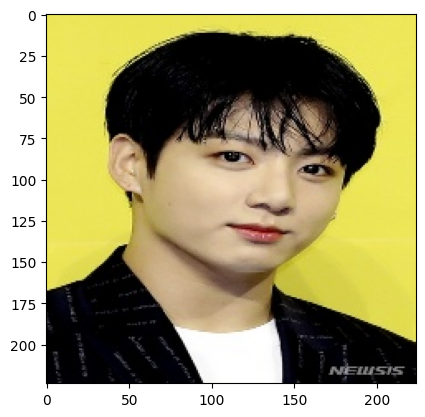

<ipython-input-4-eb20871330cf>:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Target : ", cls_dict[int(target.to("cpu").numpy())])
<ipython-input-4-eb20871330cf>:39: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Pred : ", cls_dict[int(pred.to("cpu").numpy())])


Target :  BTS Jungkook
Pred :  BTS RM


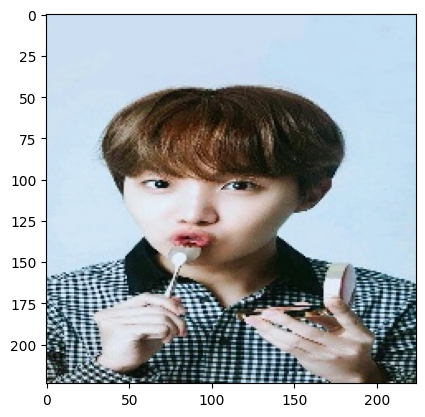

Target :  BTS J-Hope
Pred :  BTS RM


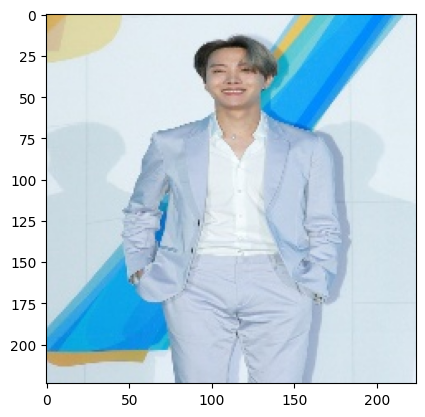

Target :  BTS J-Hope
Pred :  BTS RM


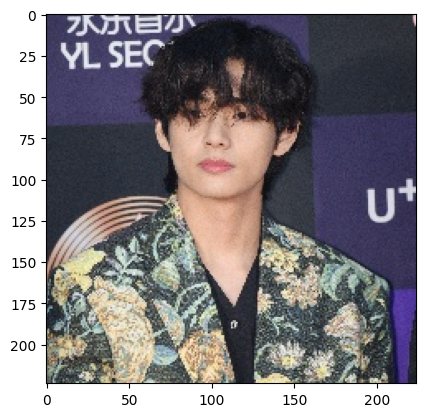

Target :  BTS V
Pred :  BTS RM


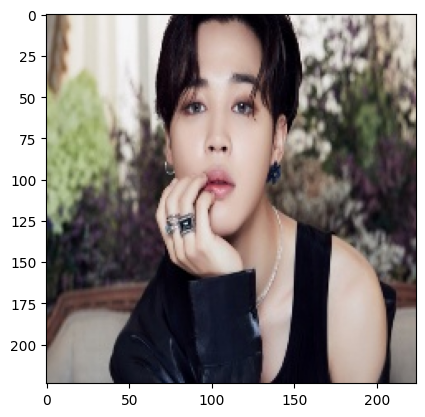

Target :  BTS Jimin
Pred :  BTS RM
Test set: Average loss : 1.9465, Accuracy : 10/70(14%)
Test set: Average loss : 1.9465, Accuracy : 10/70(14%)
Tesing time: 0m 4s
Train Epoch : 2 | Batch Status : 0/350 (0%) | Loss : 1.913951
Train Epoch : 2 | Batch Status : 40/350 (11%) | Loss : 1.934746
Train Epoch : 2 | Batch Status : 80/350 (23%) | Loss : 1.952324
Train Epoch : 2 | Batch Status : 120/350 (34%) | Loss : 1.929616
Train Epoch : 2 | Batch Status : 160/350 (45%) | Loss : 1.931626
Train Epoch : 2 | Batch Status : 200/350 (57%) | Loss : 2.017910
Train Epoch : 2 | Batch Status : 240/350 (68%) | Loss : 1.955743
Train Epoch : 2 | Batch Status : 280/350 (80%) | Loss : 1.979893
Train Epoch : 2 | Batch Status : 320/350 (91%) | Loss : 1.976999
Training time: 0m 0s
Test set: Average loss : 1.9458, Accuracy : 10/70(14%)
Tesing time: 0m 1s
Train Epoch : 3 | Batch Status : 0/350 (0%) | Loss : 1.936990
Train Epoch : 3 | Batch Status : 40/350 (11%) | Loss : 1.989968
Train Epoch : 3 | Batch Status : 80

Train Epoch : 10 | Batch Status : 200/350 (57%) | Loss : 2.255791
Train Epoch : 10 | Batch Status : 240/350 (68%) | Loss : 1.942960
Train Epoch : 10 | Batch Status : 280/350 (80%) | Loss : 2.051752
Train Epoch : 10 | Batch Status : 320/350 (91%) | Loss : 1.913343
Training time: 0m 0s


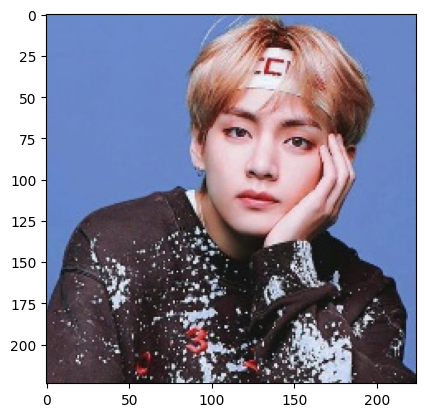

Target :  BTS V
Pred :  BTS V


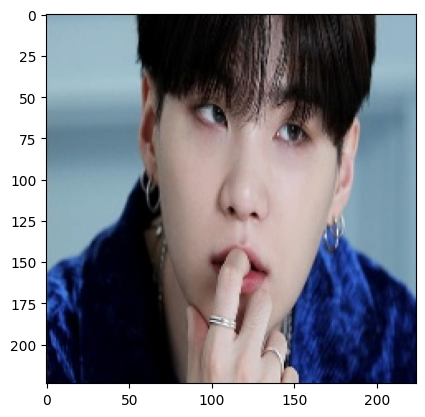

Target :  BTS Suga
Pred :  BTS V


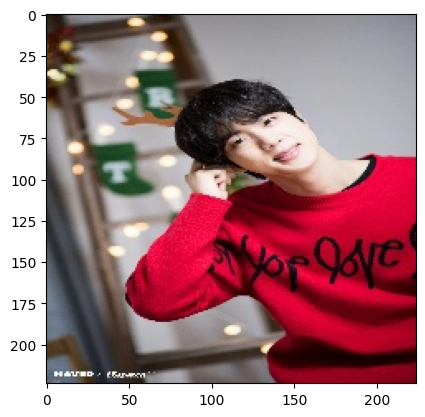

Target :  BTS Jin
Pred :  BTS V


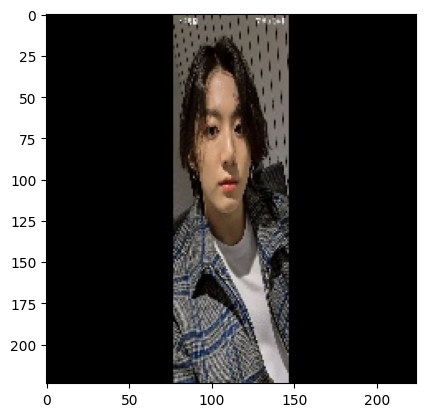

Target :  BTS Jungkook
Pred :  BTS V


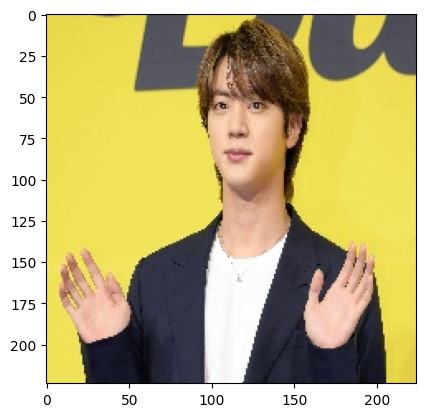

Target :  BTS Jin
Pred :  BTS V
Test set: Average loss : 1.9496, Accuracy : 10/70(14%)
Tesing time: 0m 2s
Total time : 0m  11s 
Model was trained on cuda!


In [5]:
# 학습후 매 Epoch당 test Accuracy를 확인해 보세요.
since = time.time()
for epoch in range(1, 11):
  epoch_start = time.time()
  train(epoch)
  m, s = divmod(time.time() - epoch_start, 60)
  print(f'Training time: {m:.0f}m {s:.0f}s')
  if epoch == 1:
    test(True)

  if epoch < 10:
    test()
  if epoch == 10:
    test(True)
  m, s = divmod(time.time() - epoch_start, 60)
  print(f'Tesing time: {m:.0f}m {s:.0f}s')

m, s = divmod(time.time() - since, 60)
print(f'Total time : {m:.0f}m {s: .0f}s \nModel was trained on {device}!')